In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
symptom_description = pd.read_csv('../data/symptom_Description.csv')

In [3]:
symptom_precaution = pd.read_csv('../data/symptom_precaution.csv')

In [4]:
symptom_severity = pd.read_csv('../data/Symptom-severity.csv')

In [5]:
data = pd.read_csv('../data/dataset.csv')

In [6]:
symptom_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [7]:
symptom_precaution.head()
# print(symptom_precaution.shape)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [8]:
symptom_severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [9]:
symptom_description.shape, symptom_precaution.shape, symptom_severity.shape, data.shape

((41, 2), (41, 5), (133, 2), (4920, 18))

In [10]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [12]:
data.shape

(4920, 18)

In [13]:
symptoms = data.drop('Disease', axis=1)

In [14]:
symptoms

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data['Symptom_1'].value_counts()

Symptom_1
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                       12
 pain_during_bowel_movements      6
 cramps           

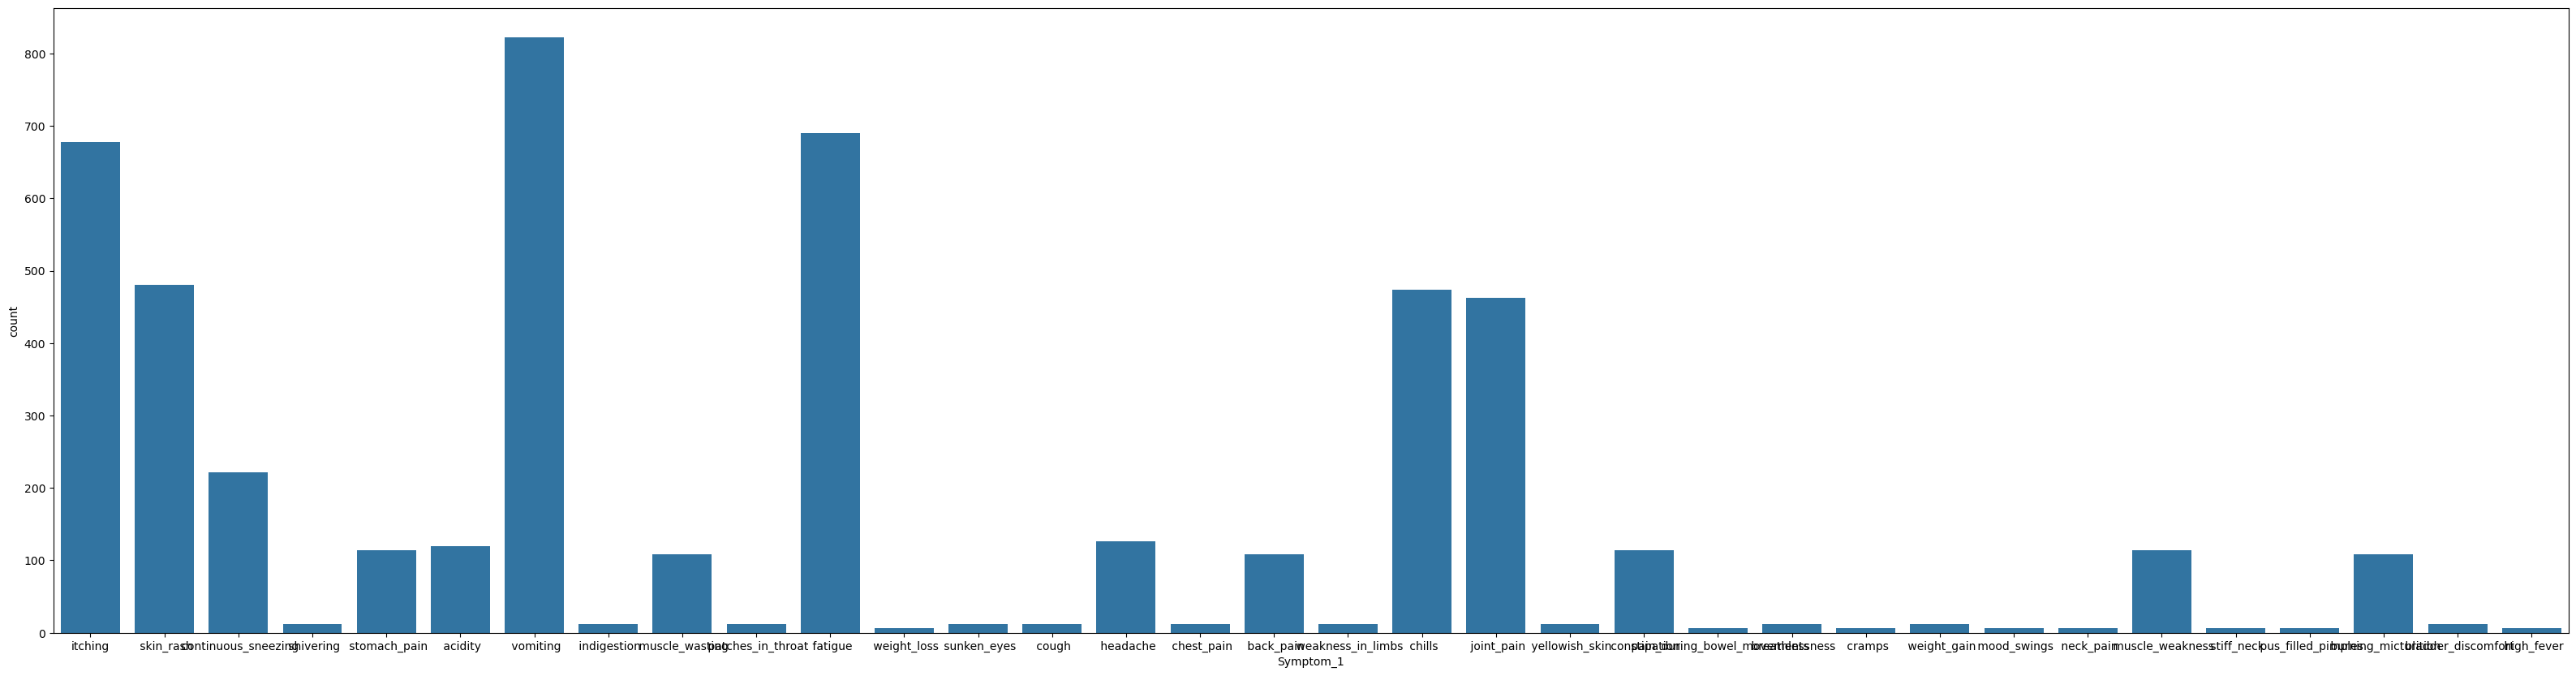

In [16]:
# Countplot
plt.figure(figsize=(40,10))
sns.countplot(x='Symptom_1', data=data)
plt.show()

# Cross-tabulation
# pd.crosstab(df['color'], df['size'])

In [17]:
for column in symptoms.columns:
    # print(f"Unique Symptoms for {symptoms[column].unique()}")
    # print(f"Total Unique value is {symptoms[column].unique()}")
    print("""--------------------------------------------------------------------""")
    print(f"Value counts for {column}:")
    print(symptoms[column].value_counts())
    print("\n" + "-"*40 + "\n")
    # plt.bar(symptoms[column].value_counts())

--------------------------------------------------------------------
Value counts for Symptom_1:
Symptom_1
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                 

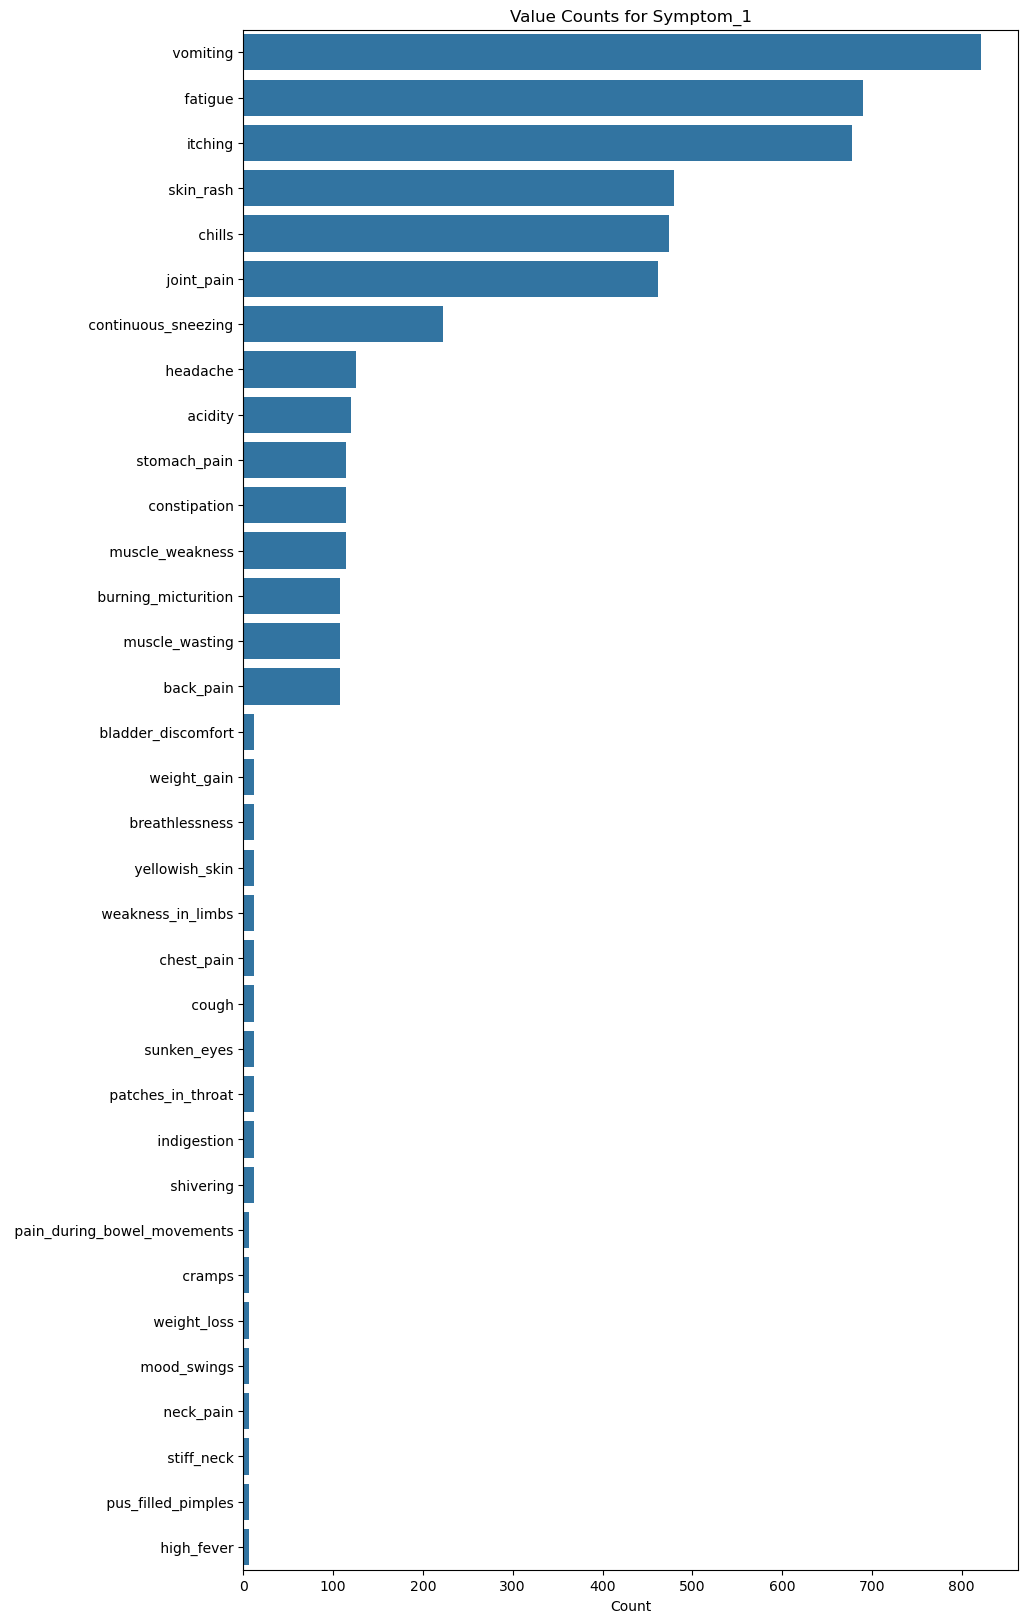

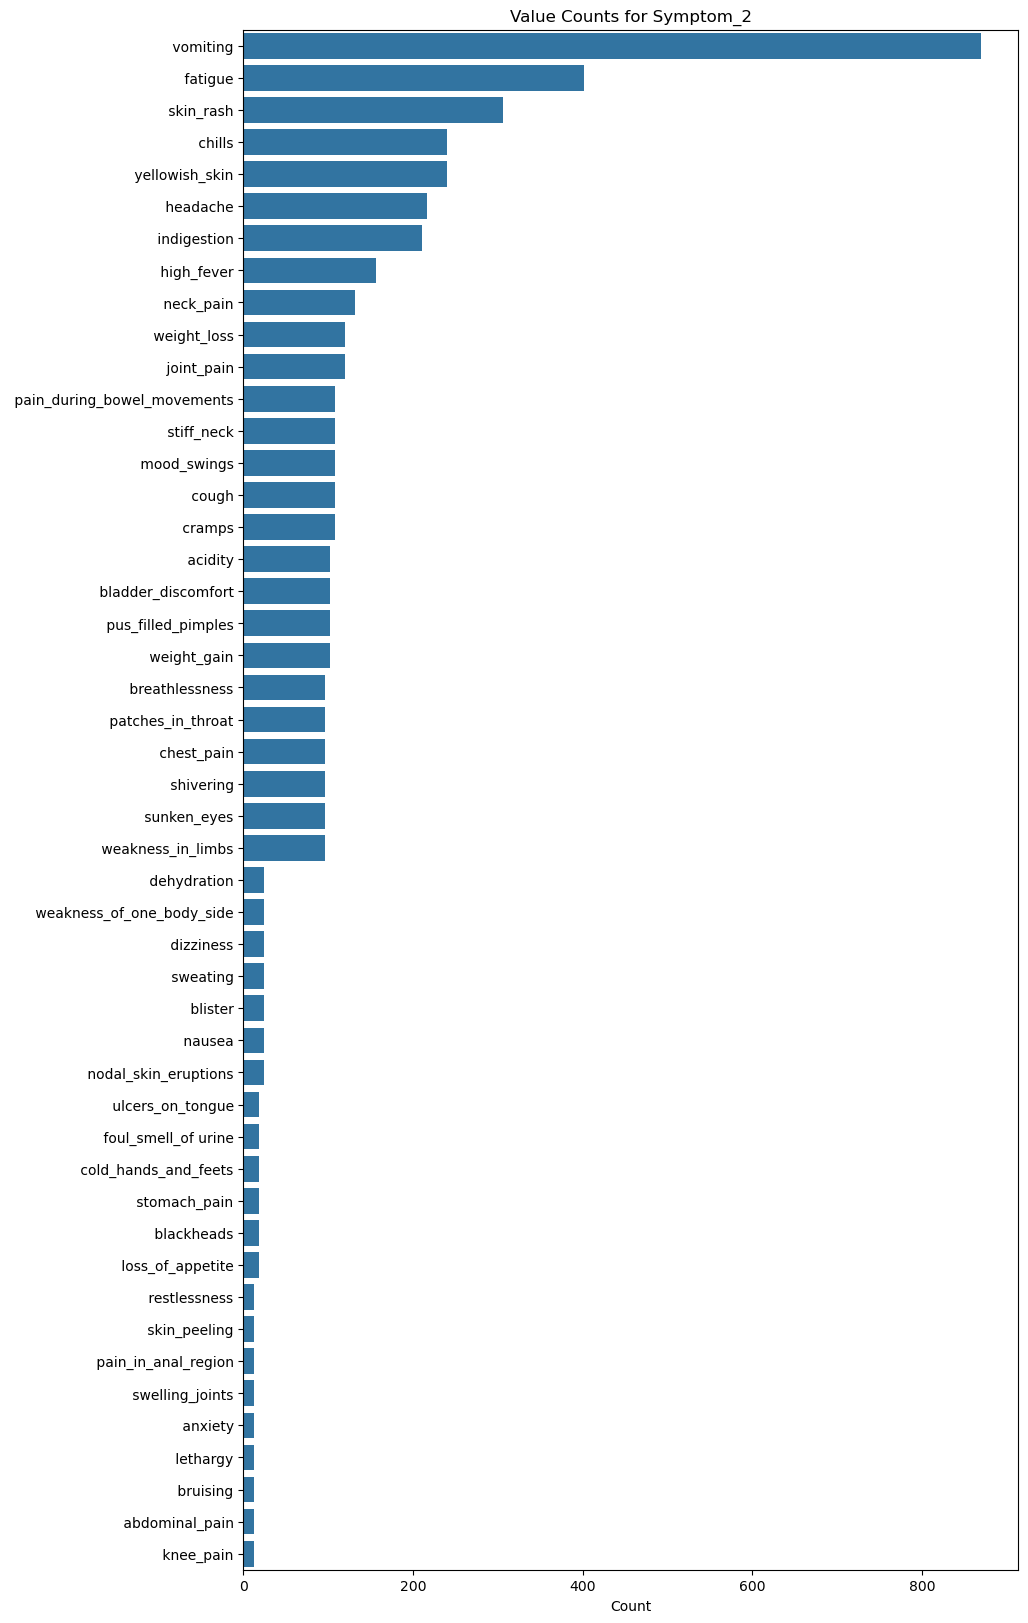

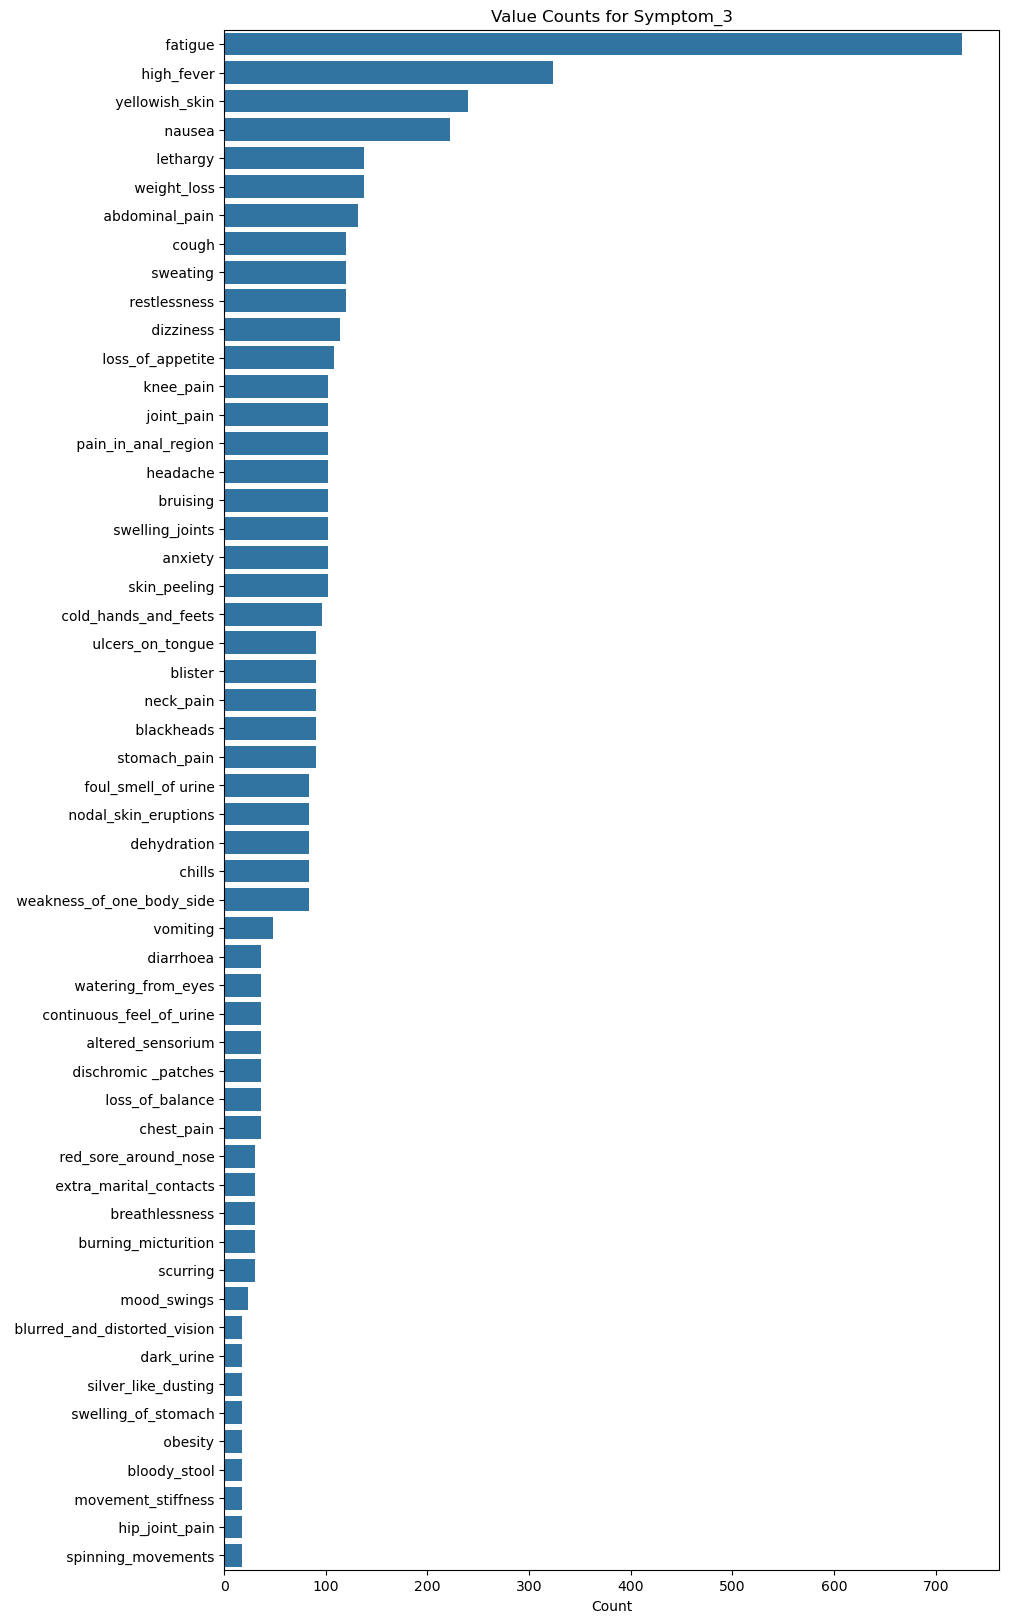

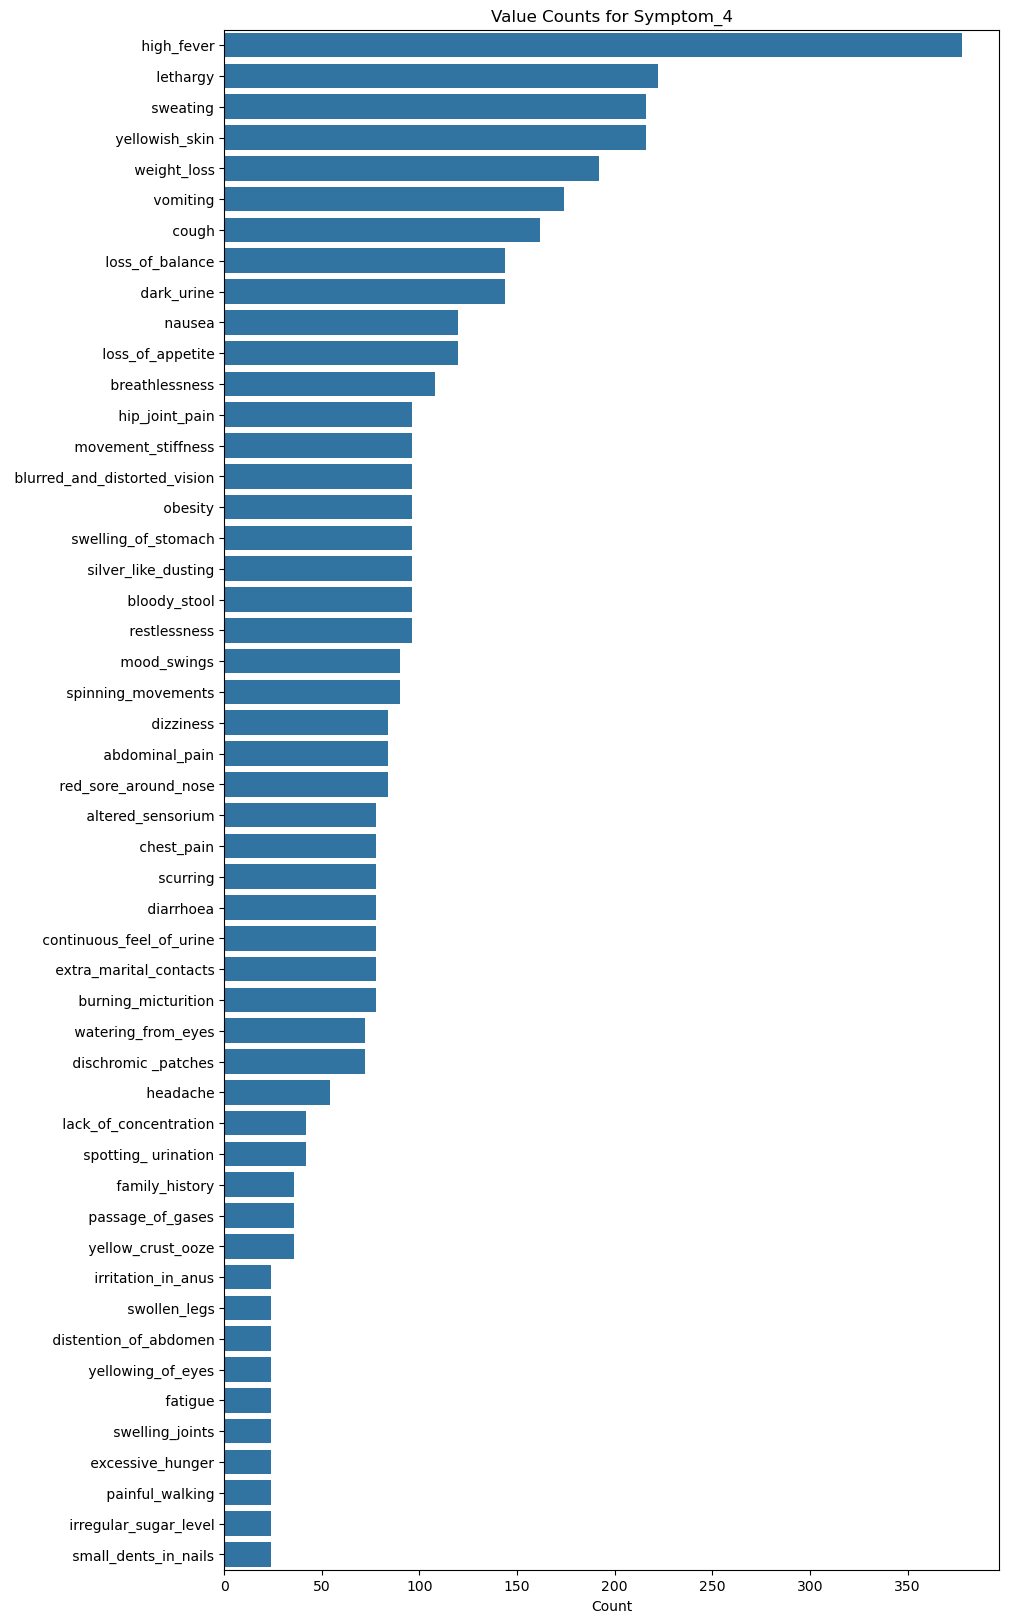

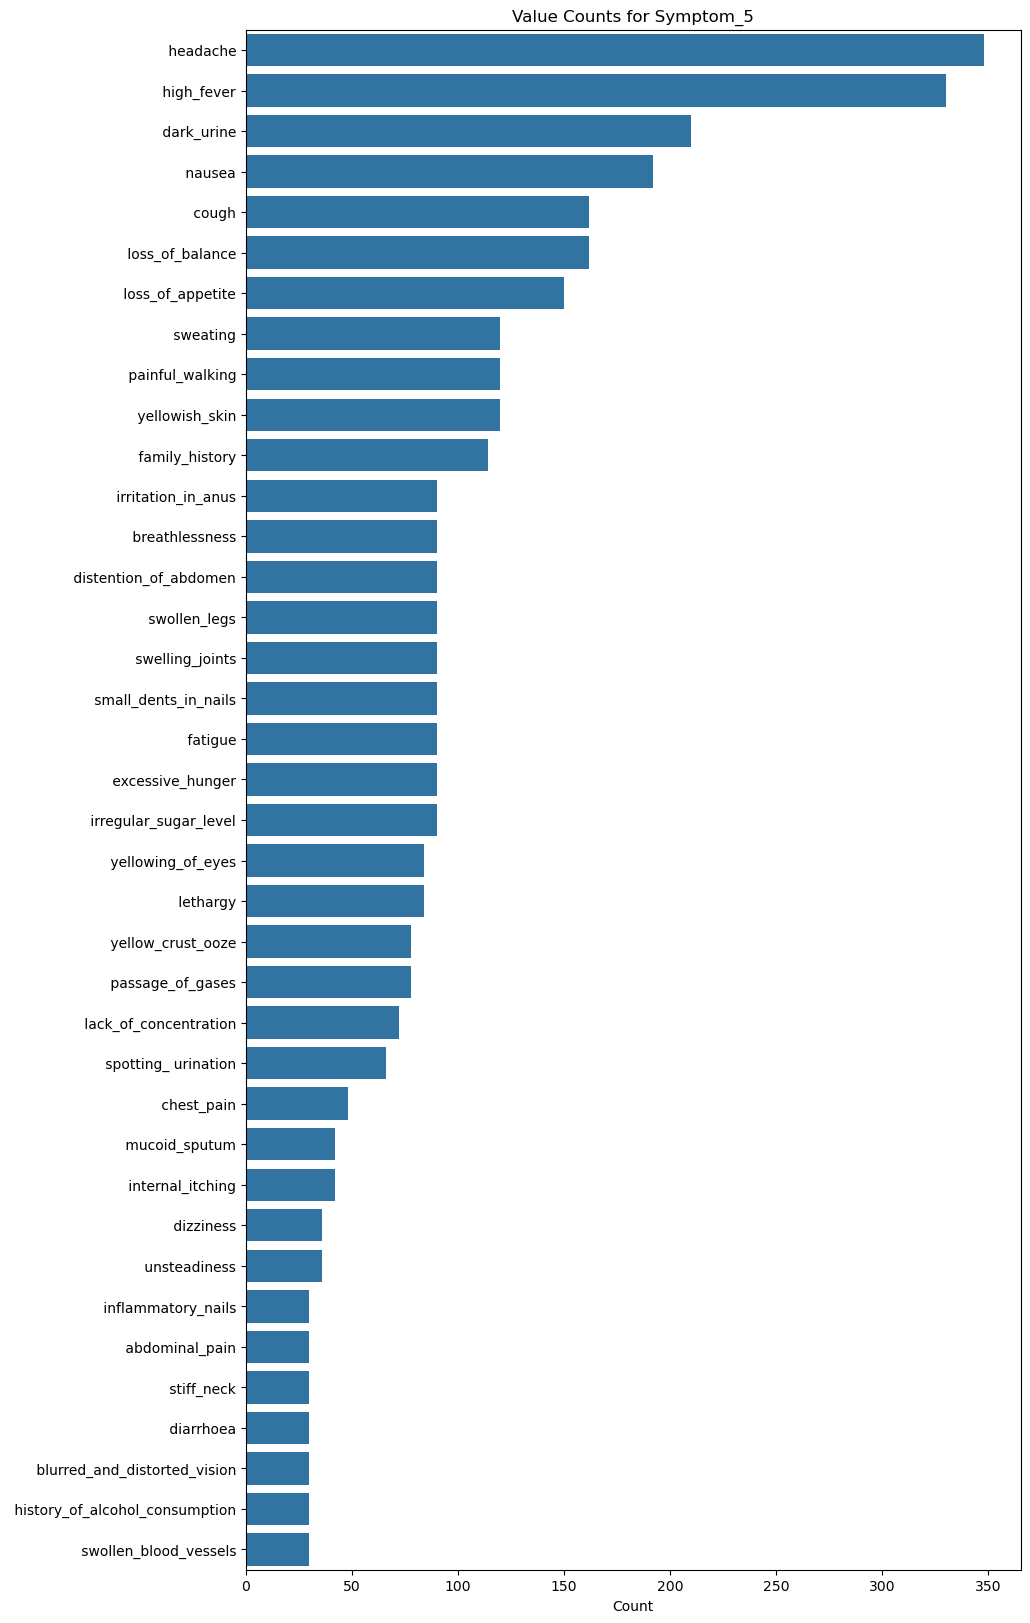

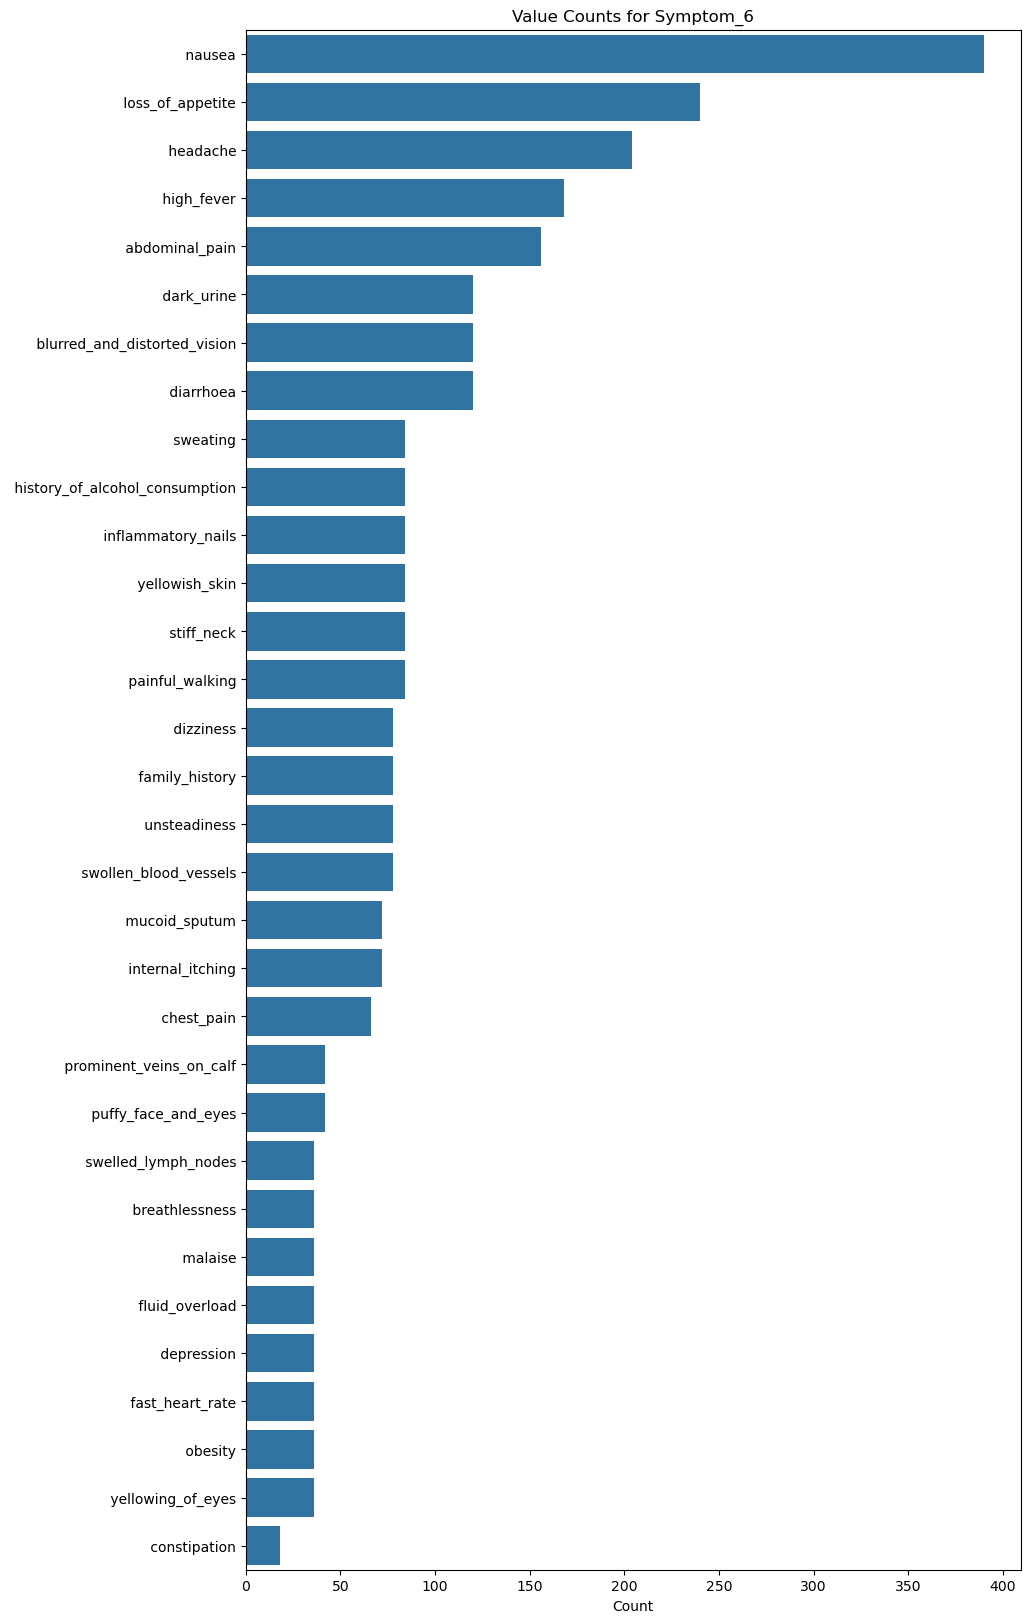

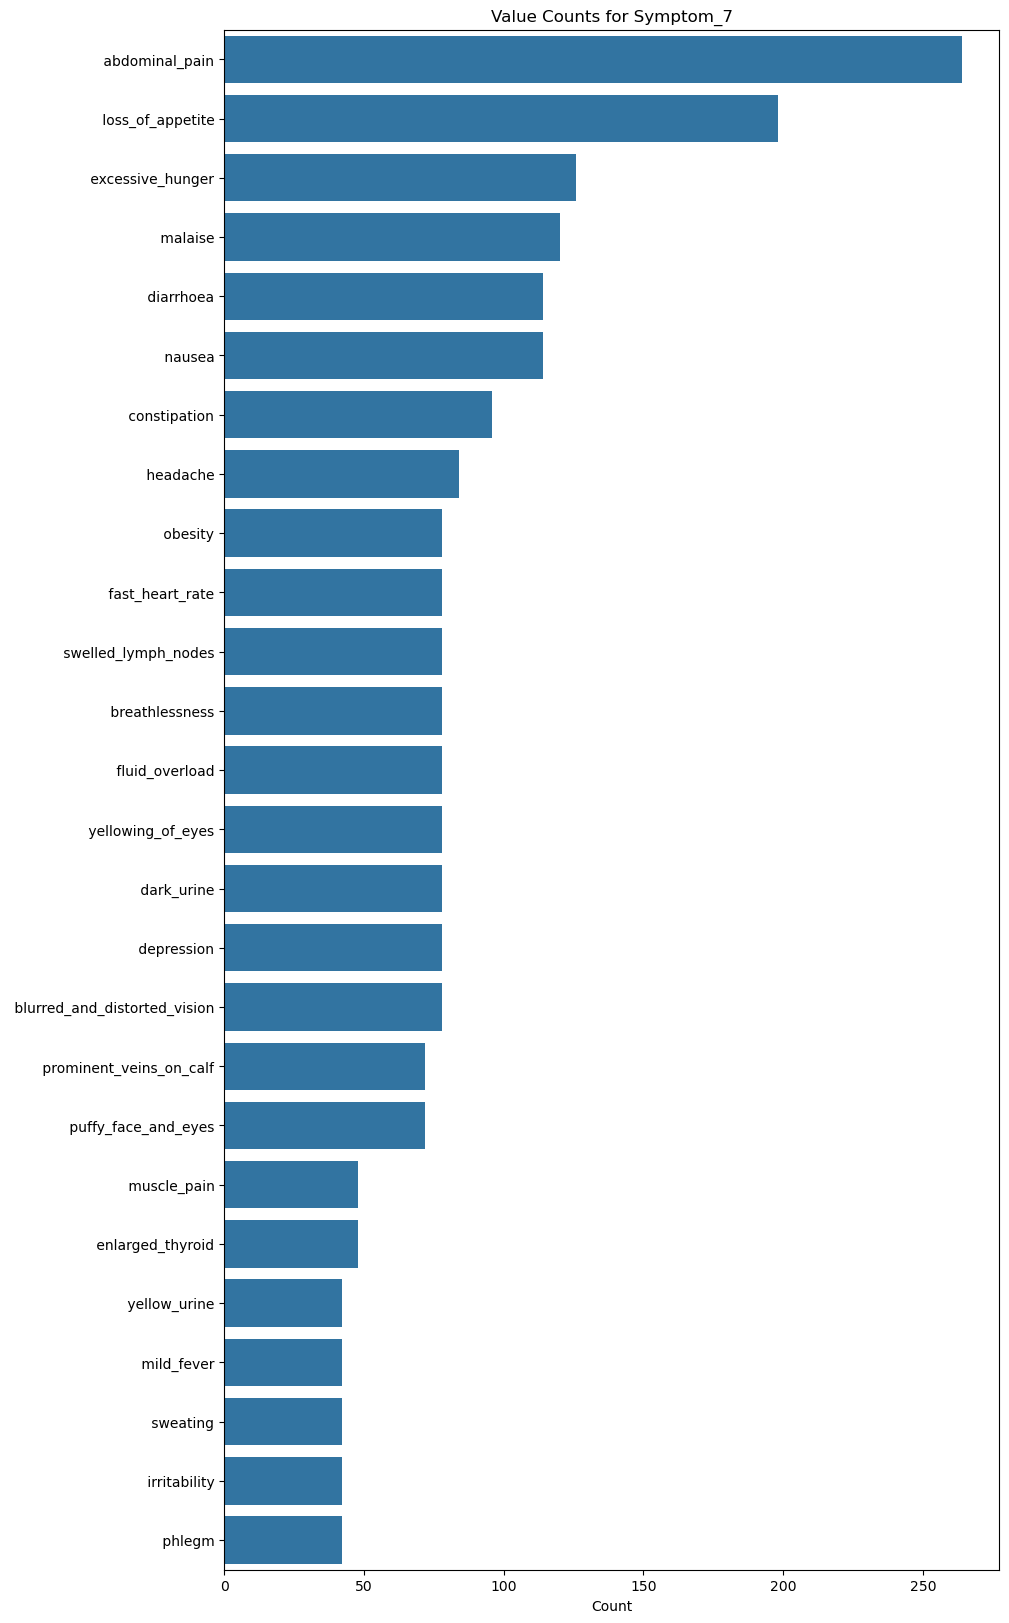

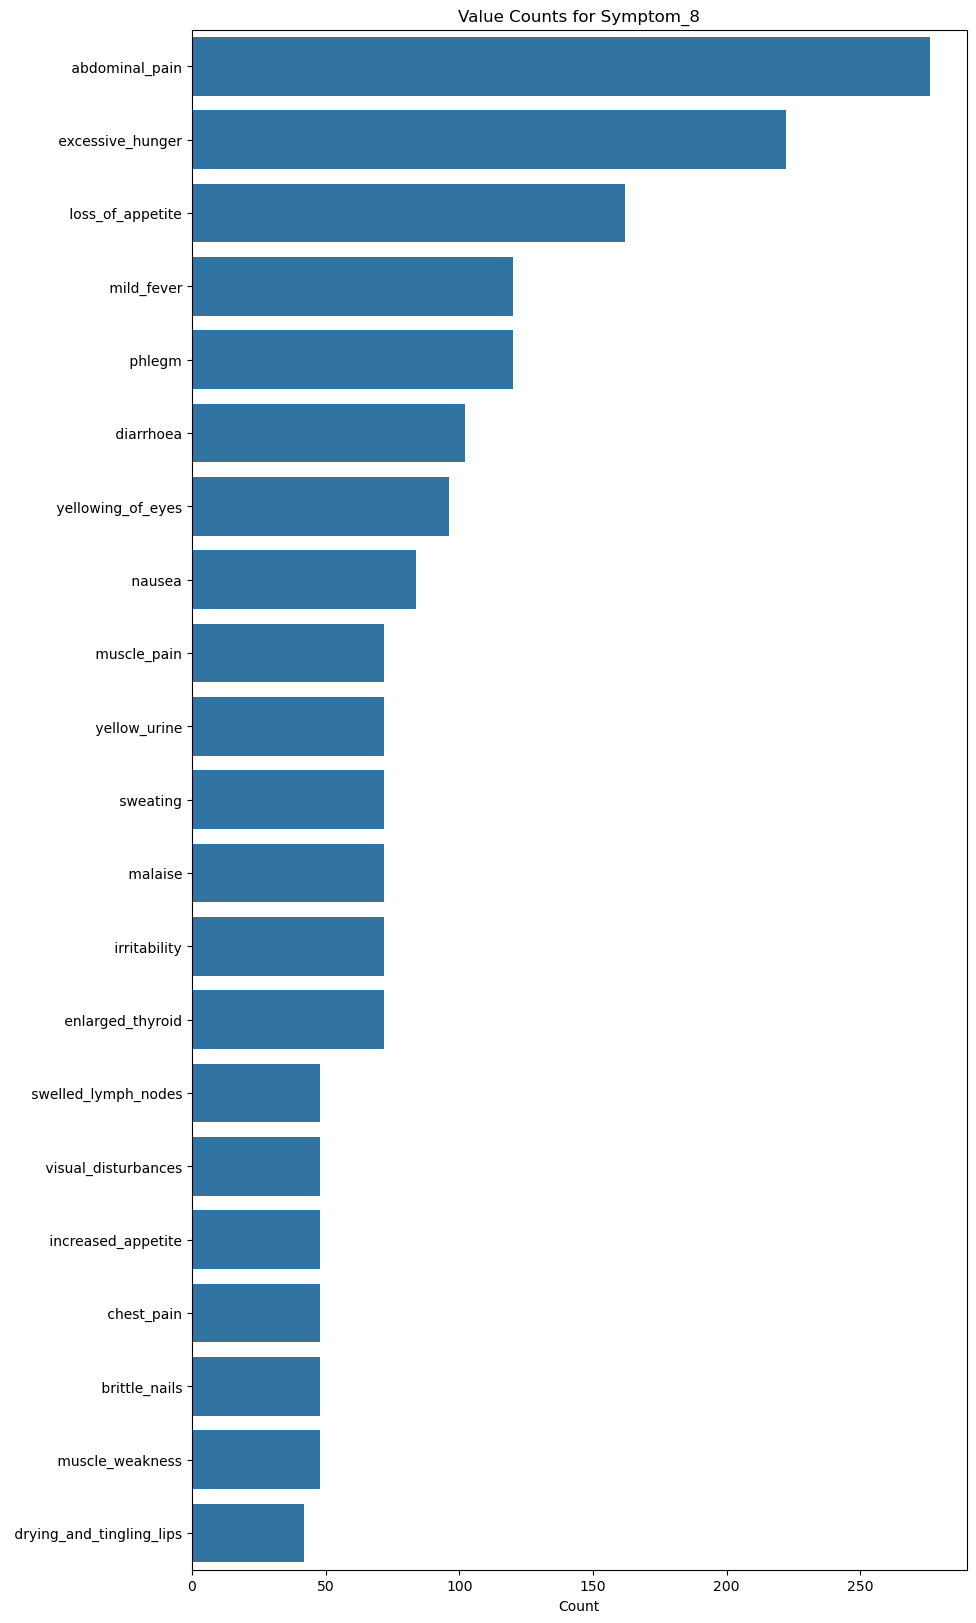

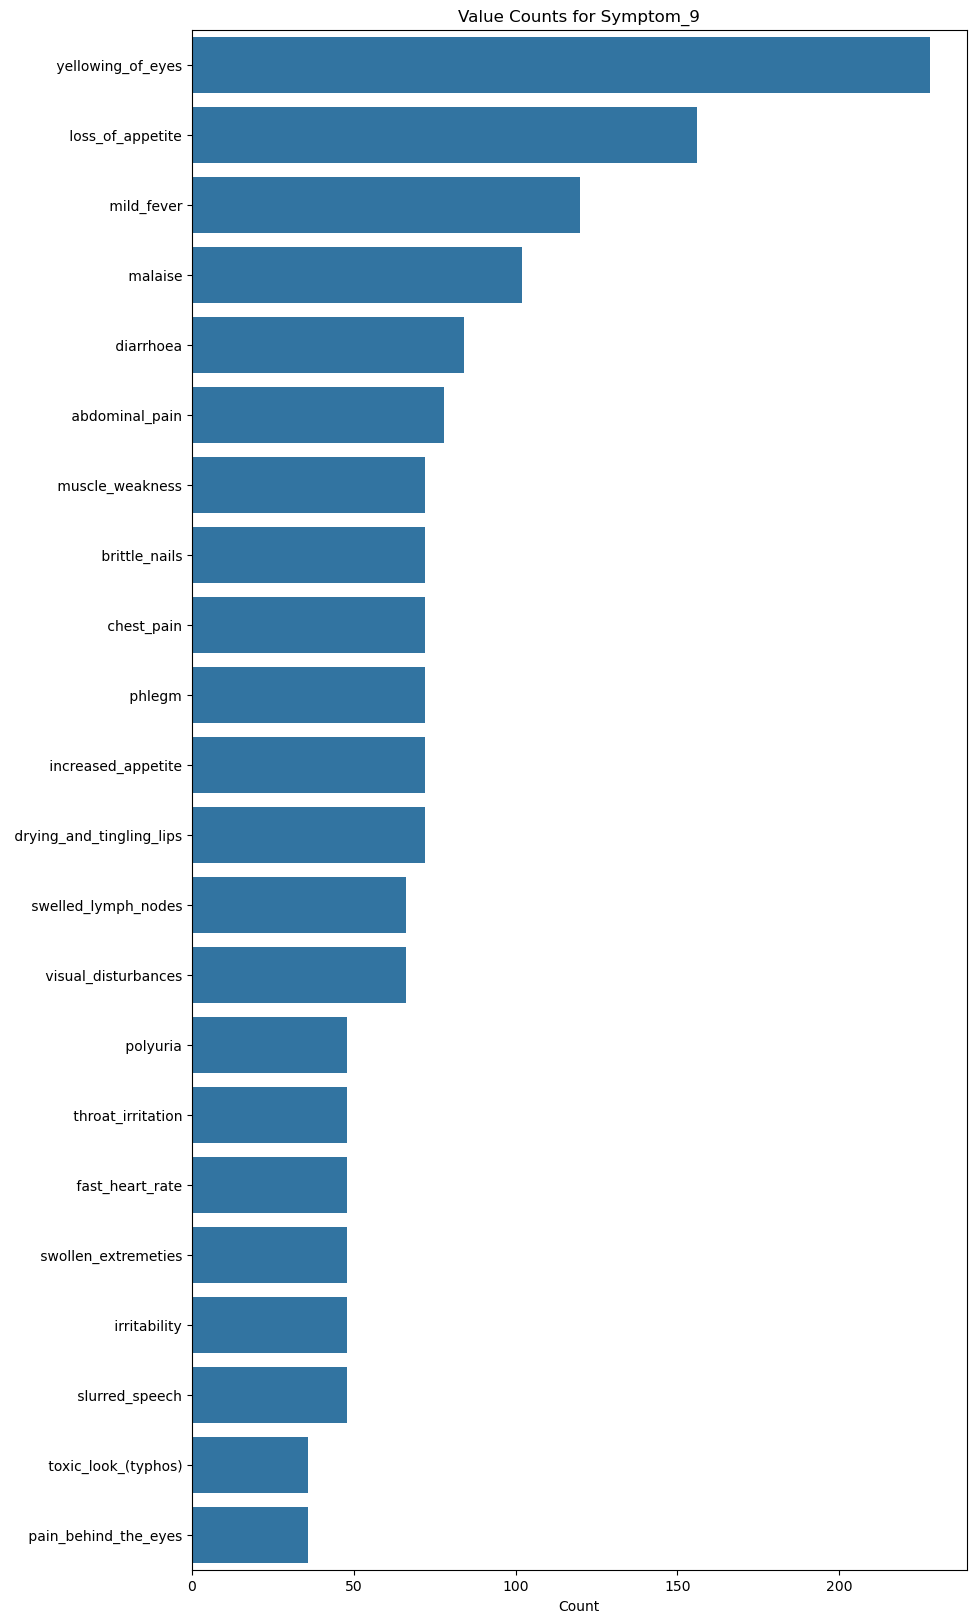

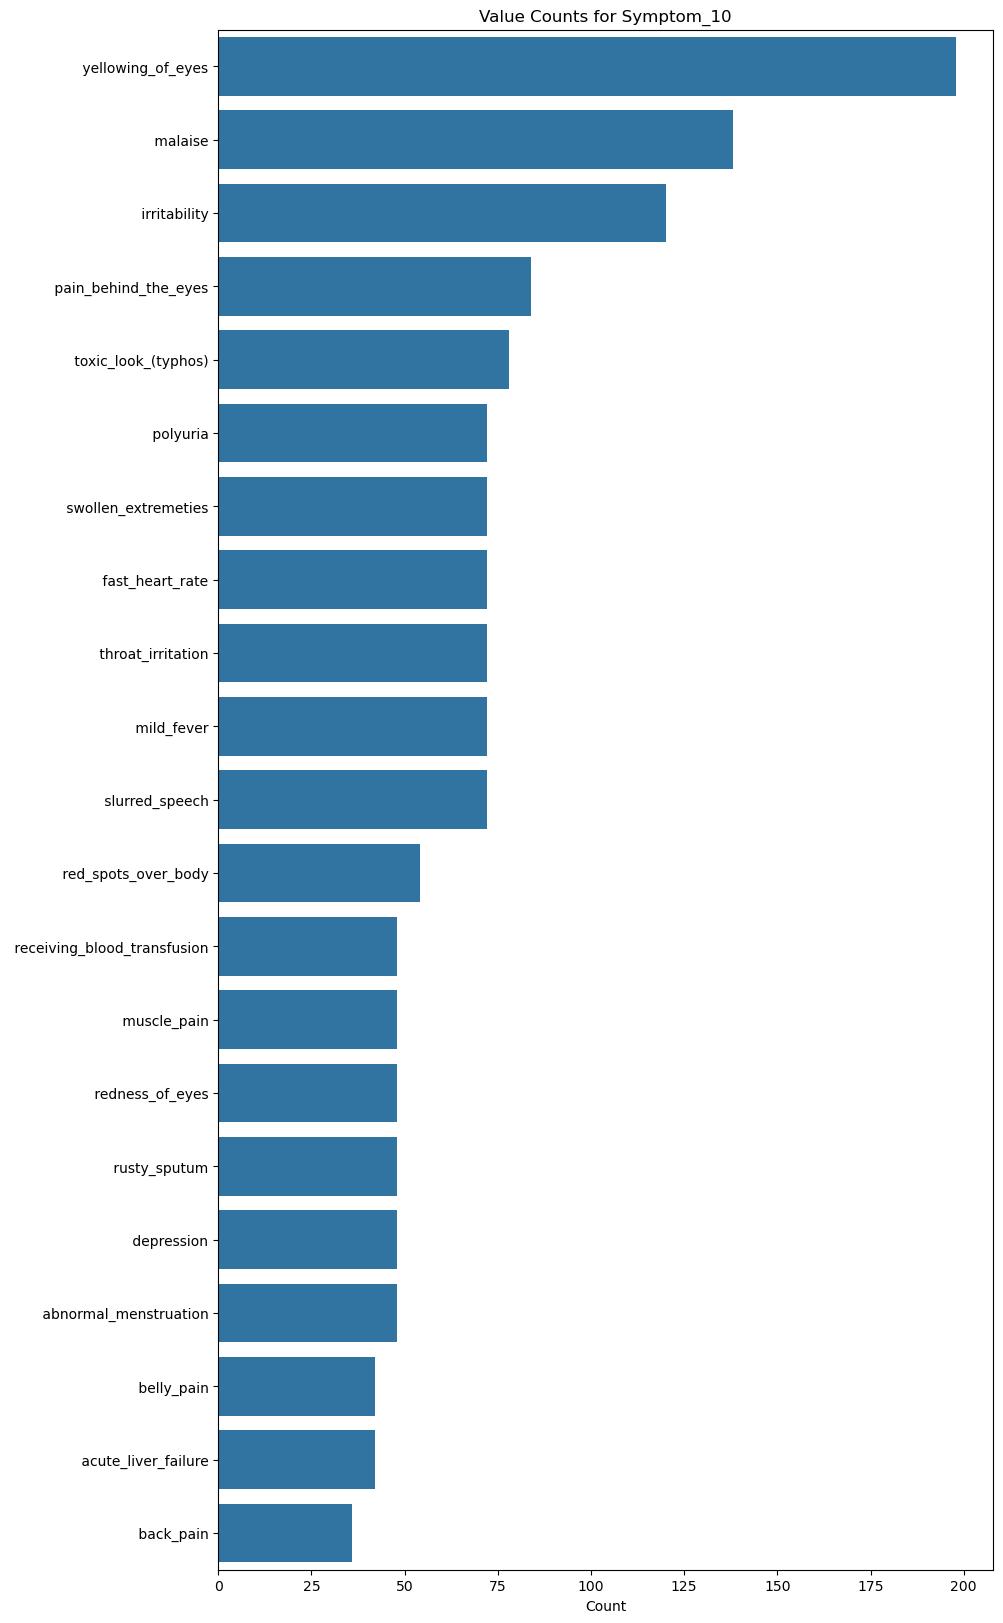

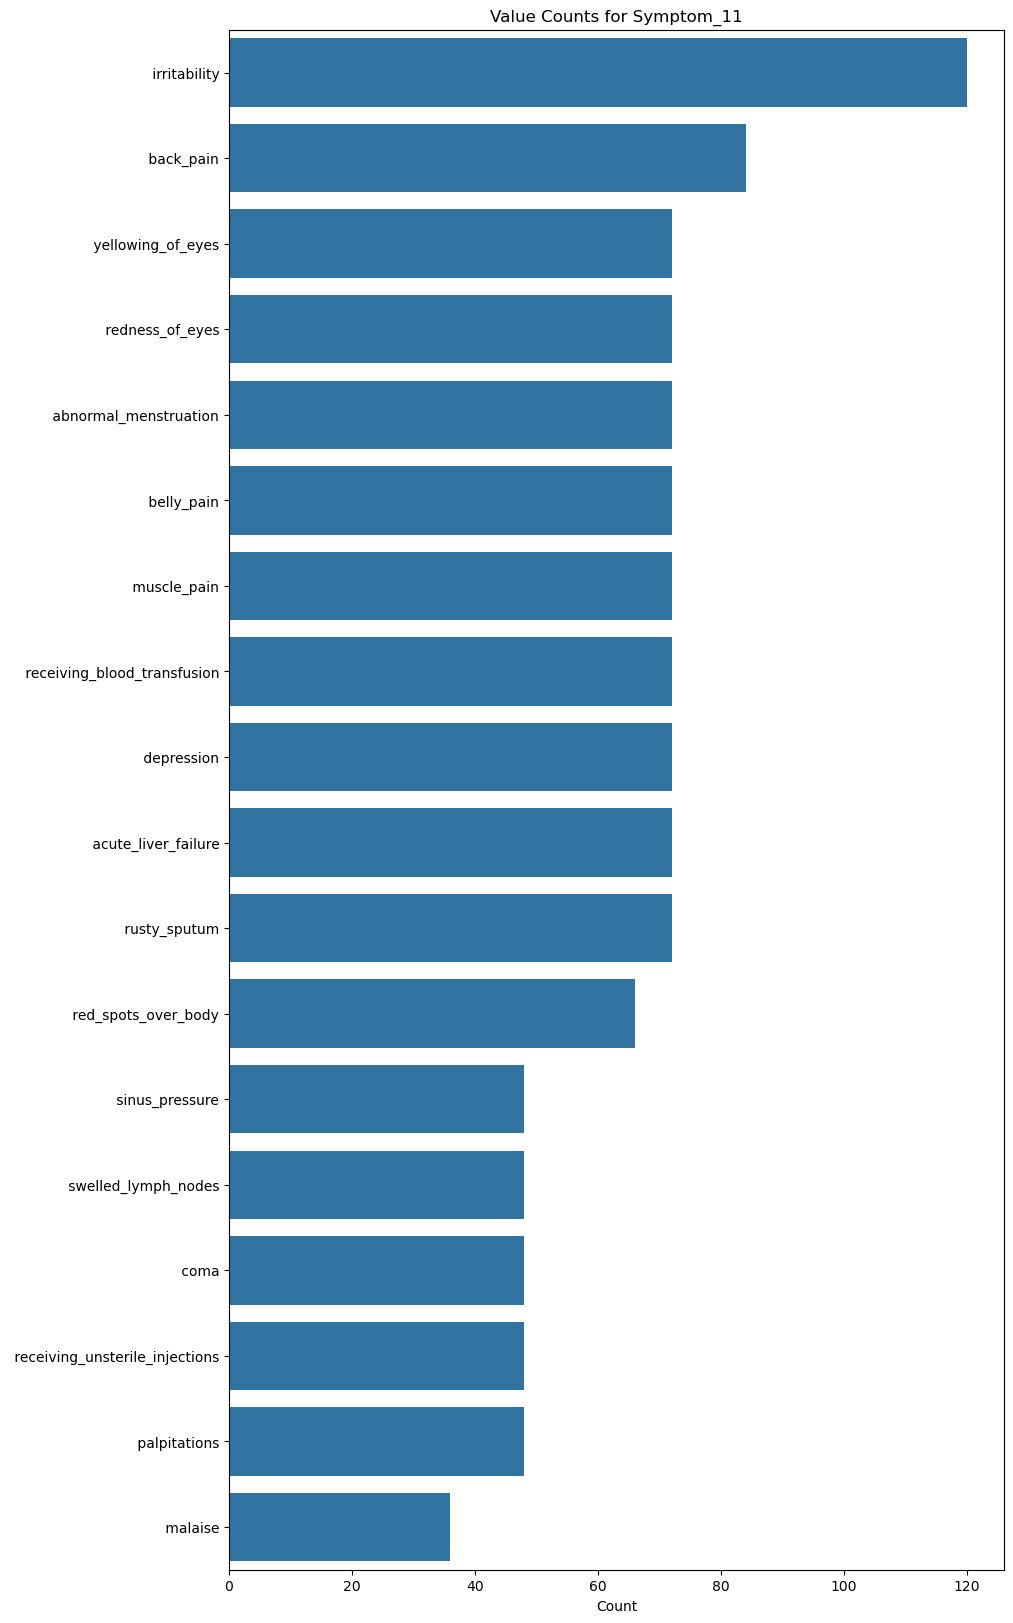

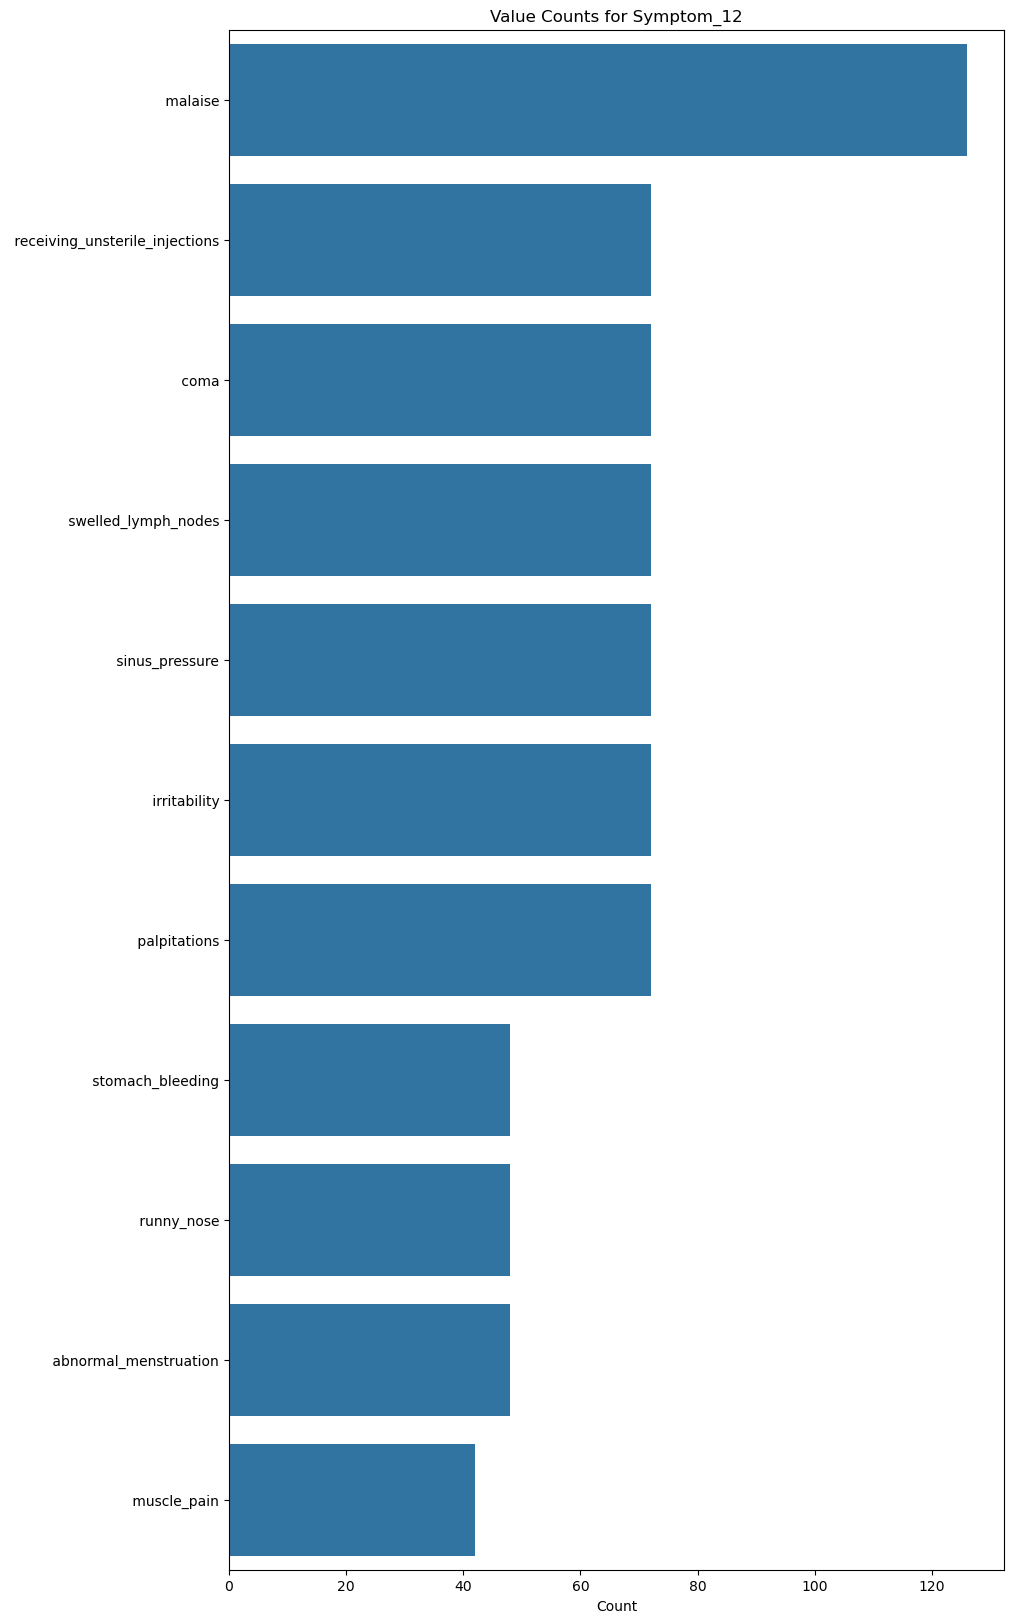

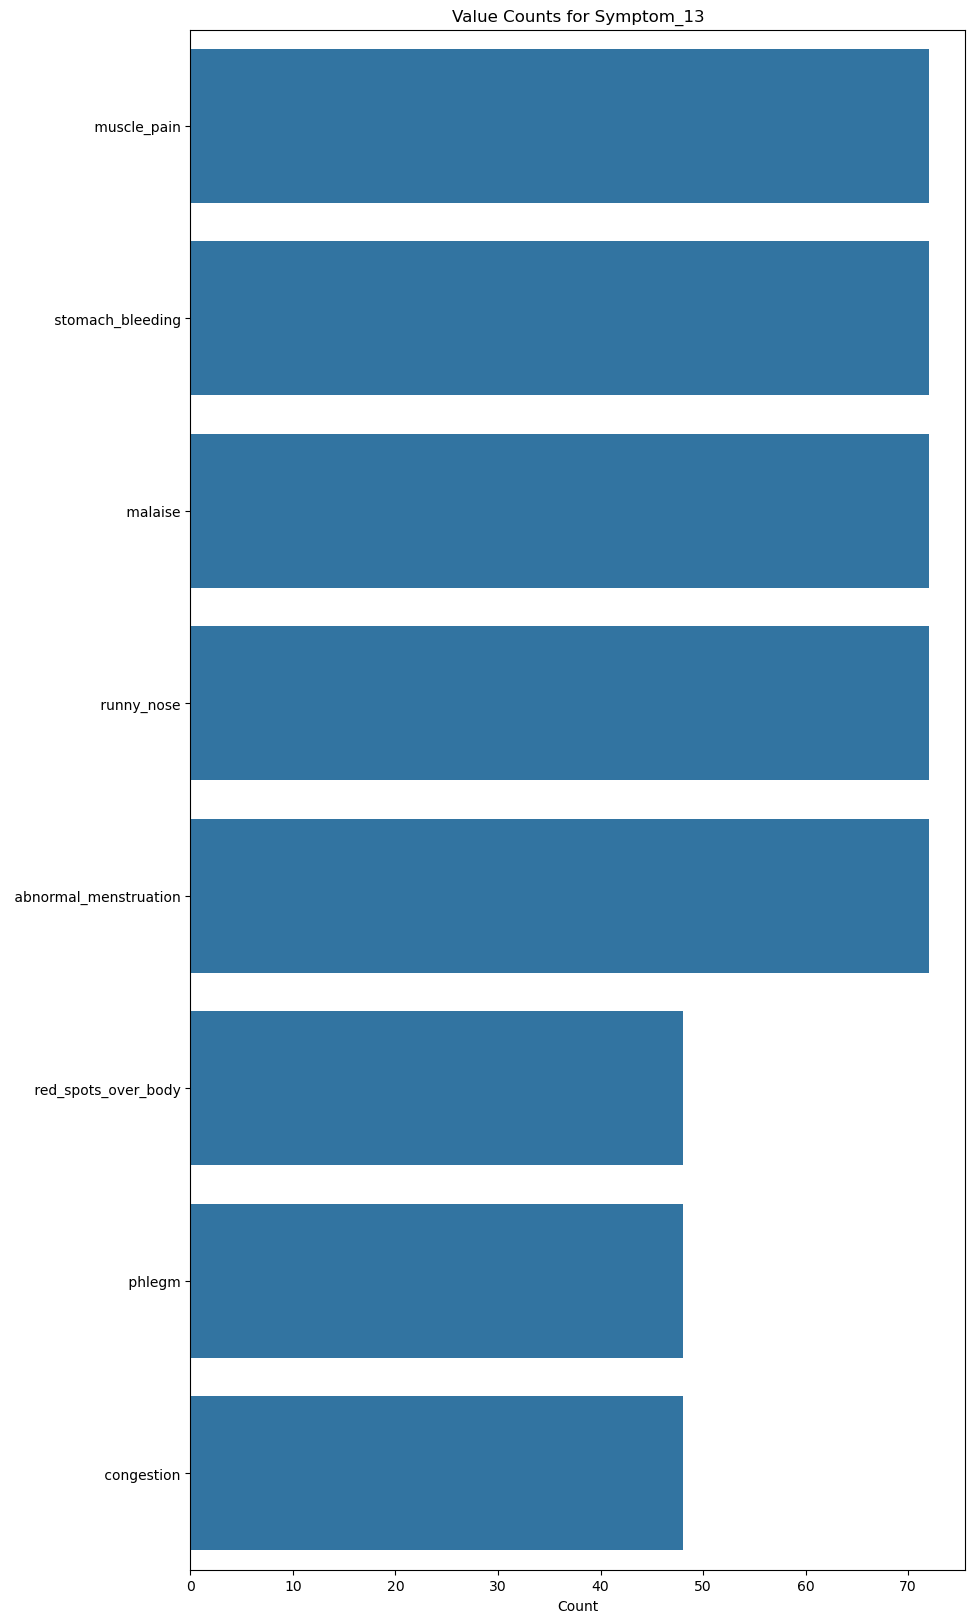

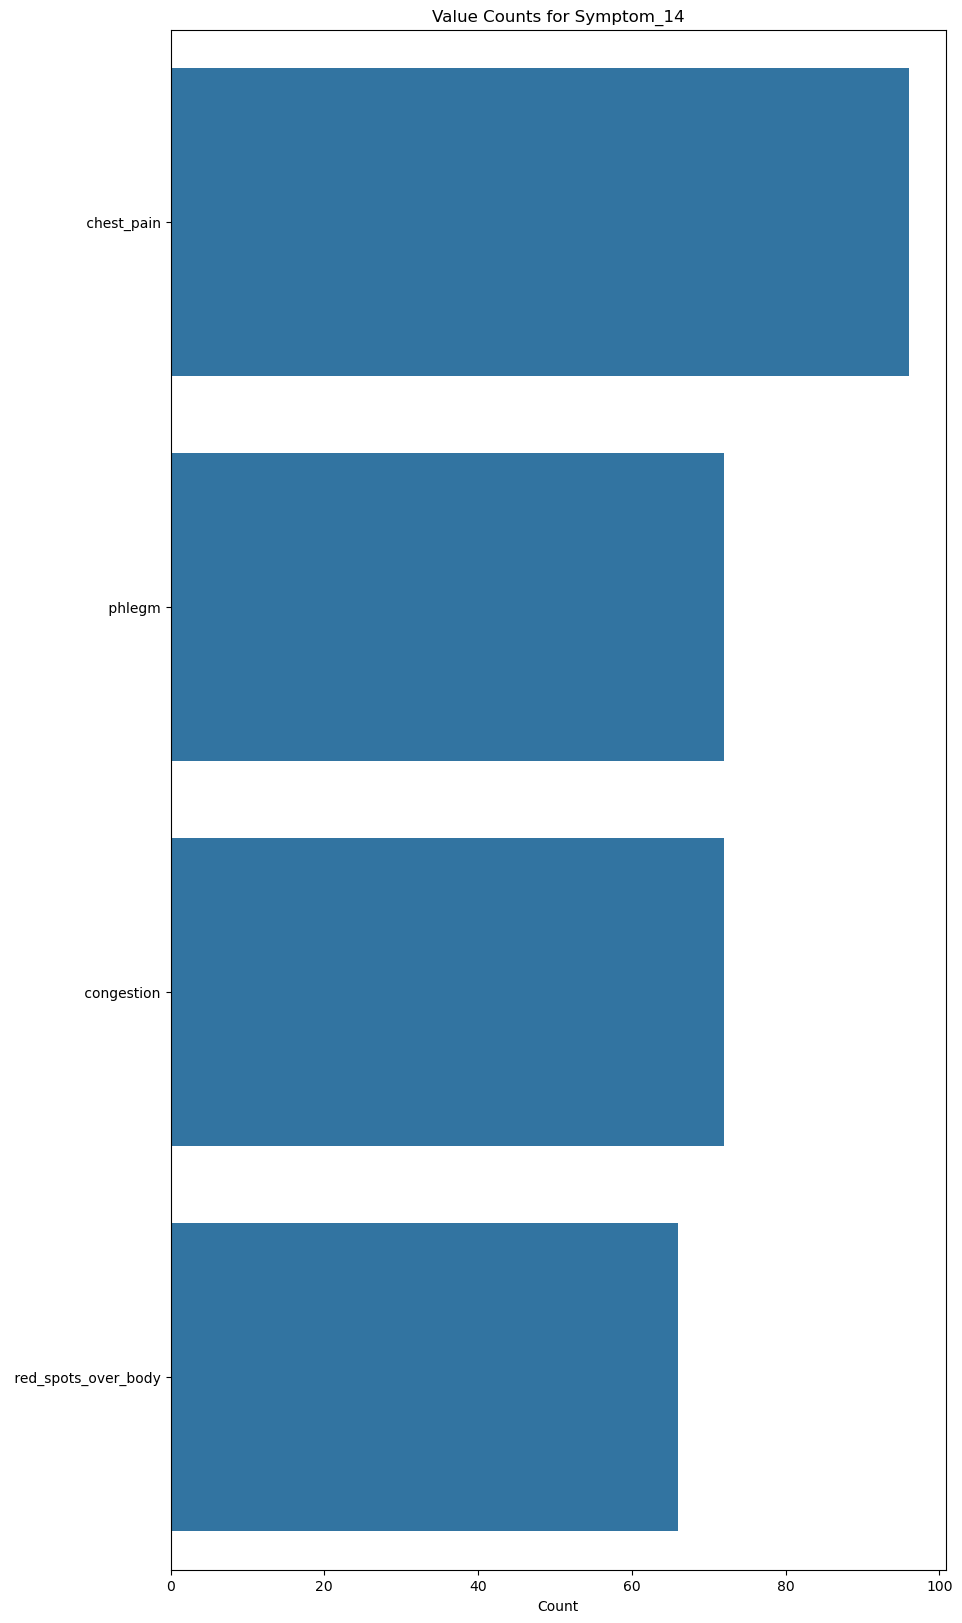

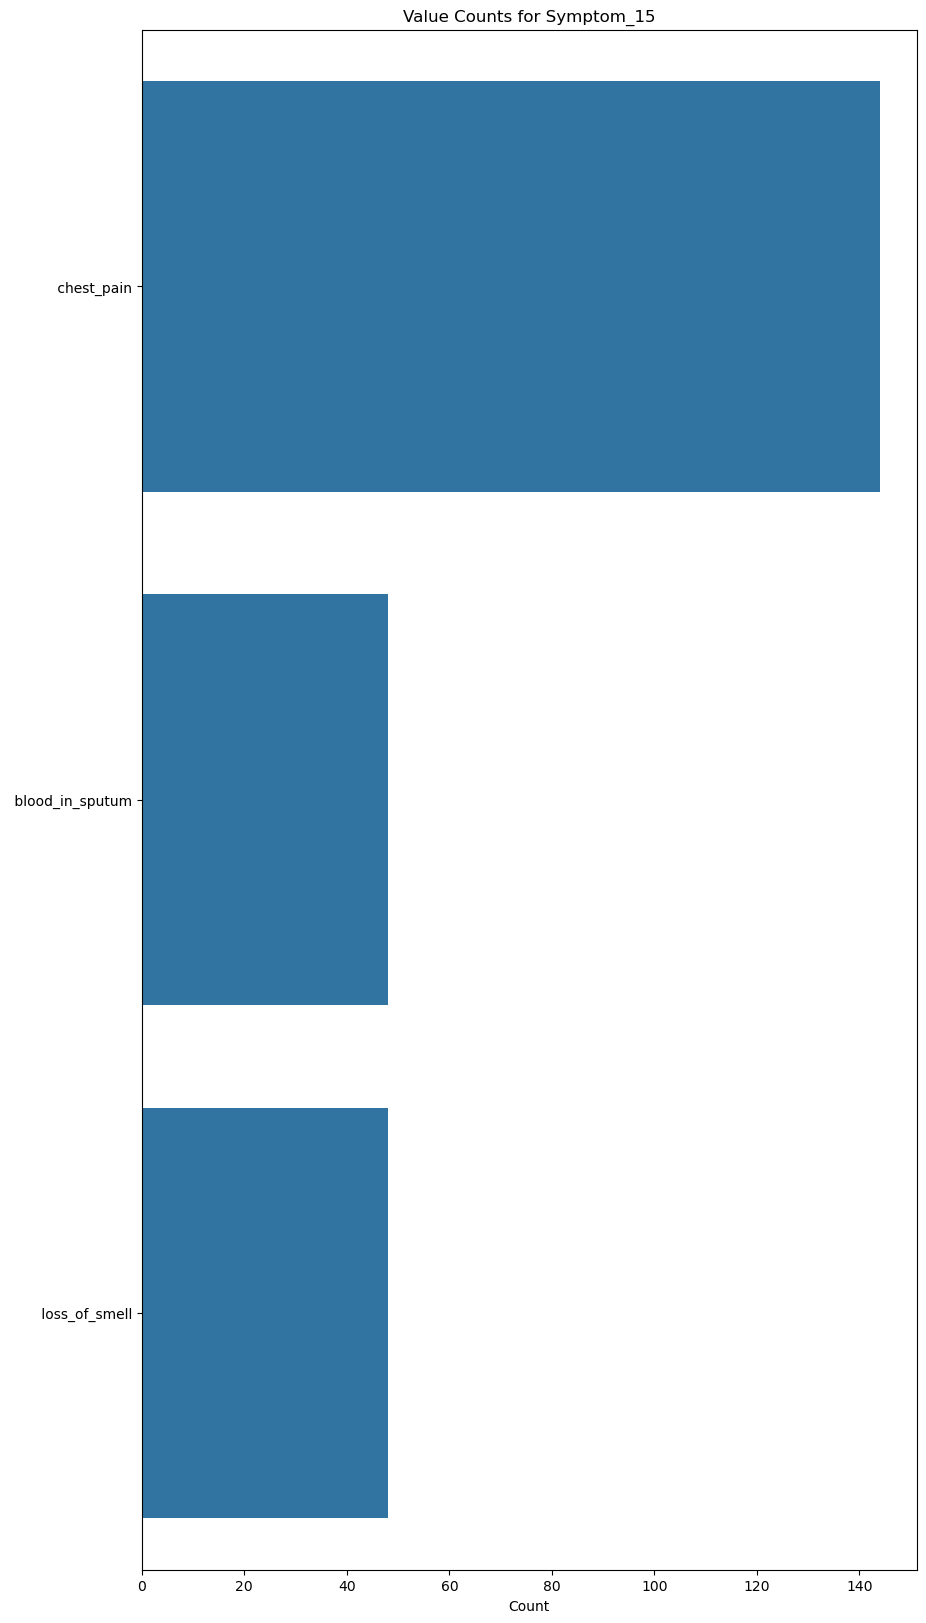

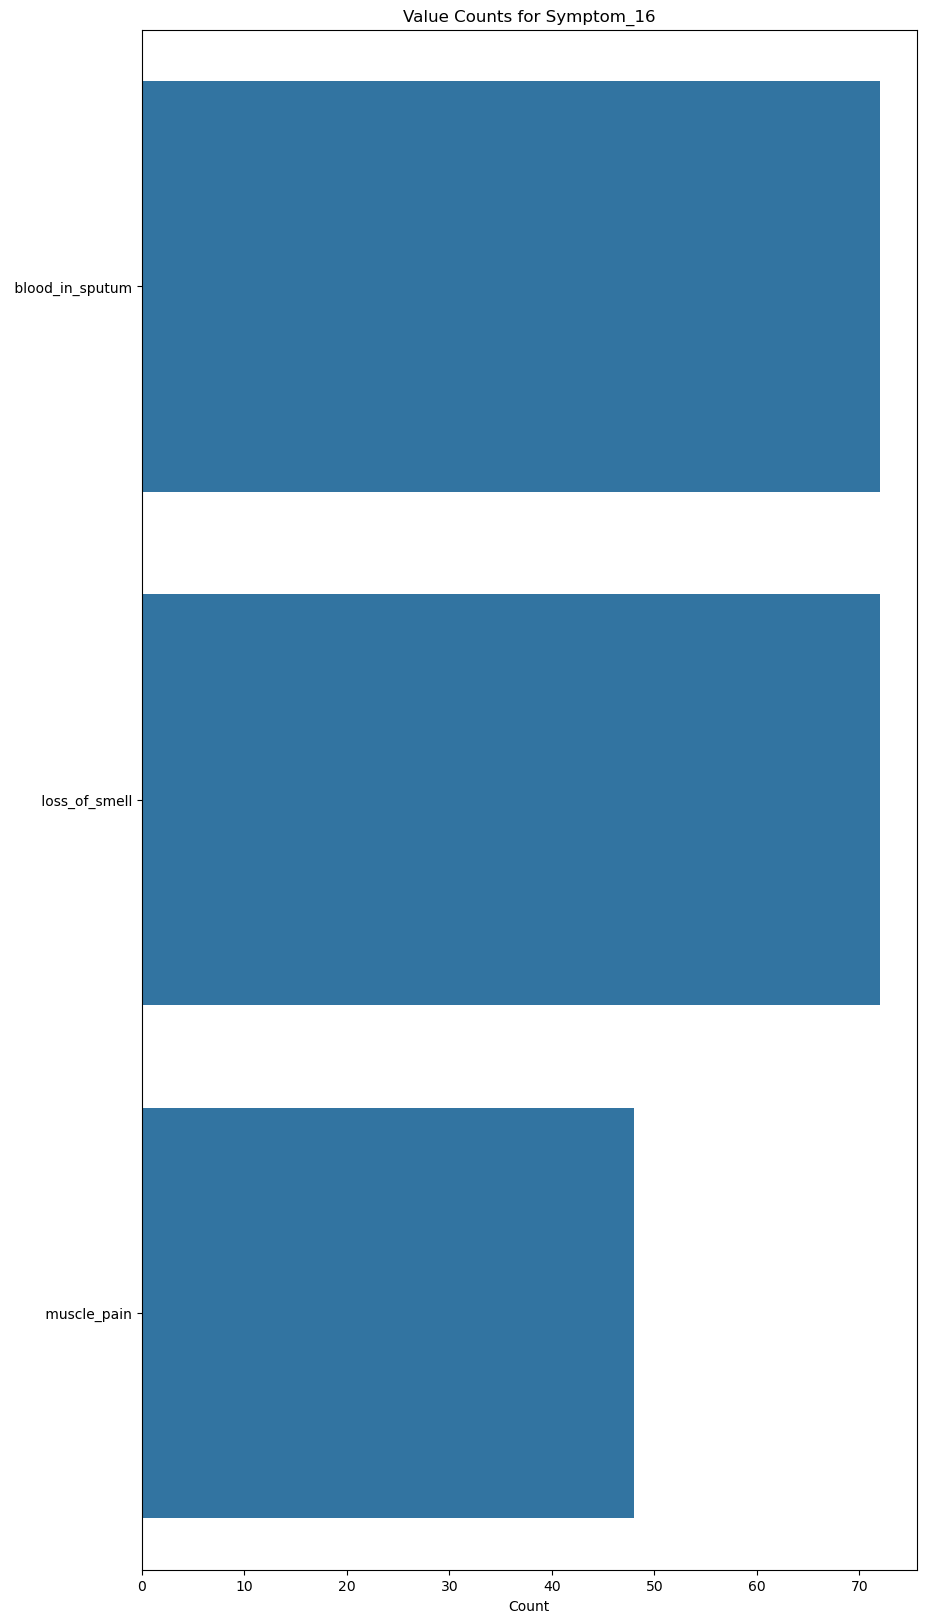

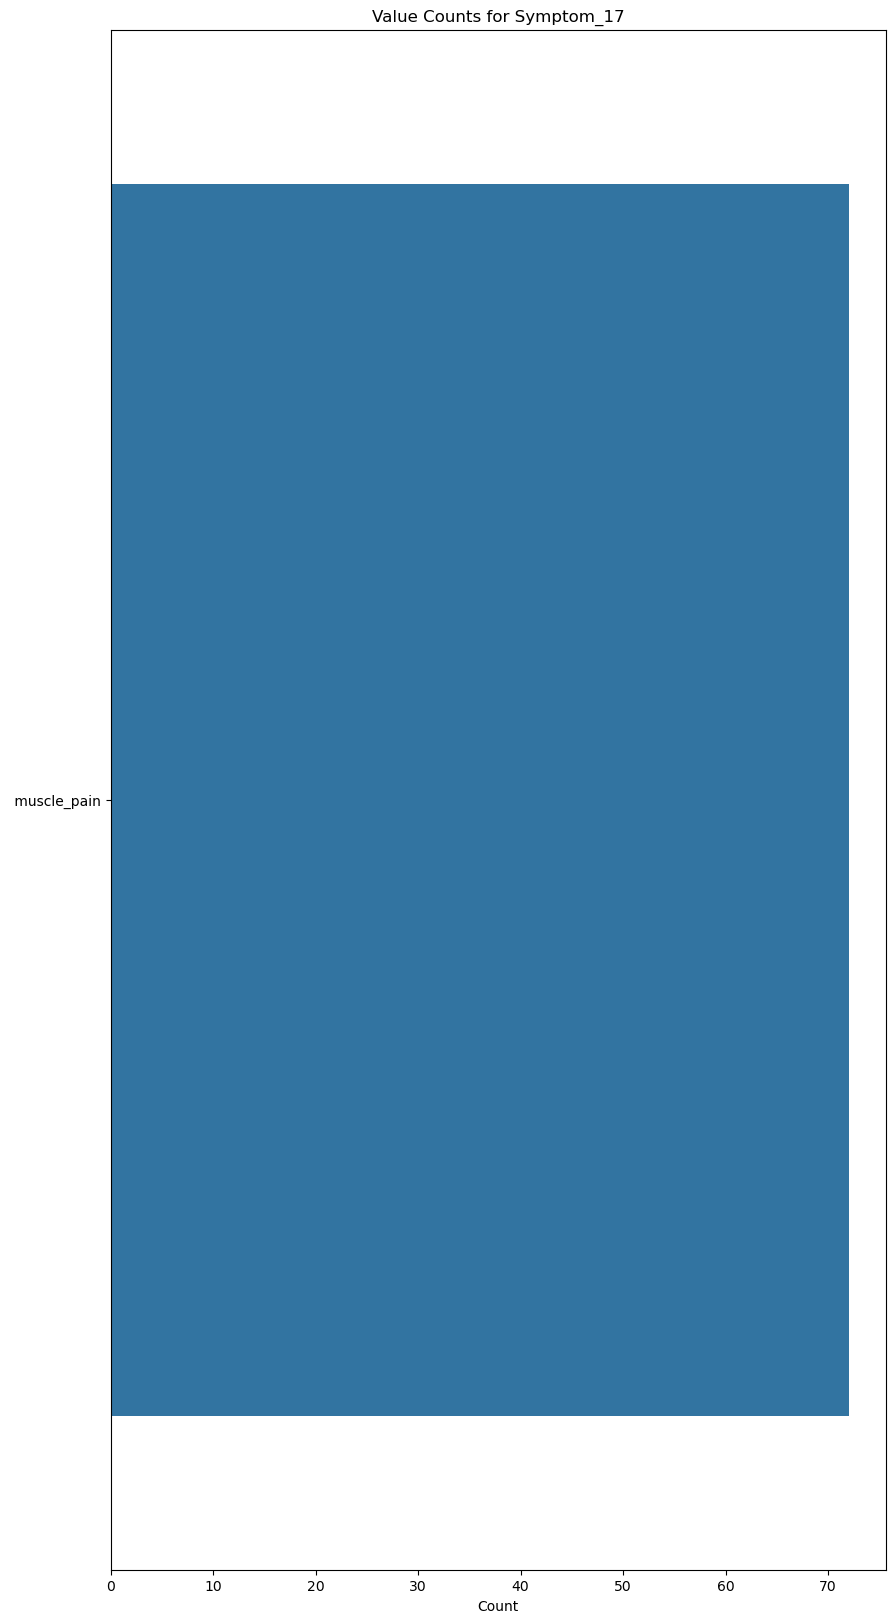

In [18]:
for column in symptoms.columns:
    plt.figure(figsize=(10, 20))
    sns.countplot(data=symptoms, y=column, order=symptoms[column].value_counts().index)
    plt.title(f"Value Counts for {column}")
    plt.xlabel("Count")
    plt.ylabel("")
    plt.show()

In [19]:
data.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [20]:
data.shape

(4920, 18)

In [21]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
symptoms['Symptom_4'].value_counts()

Symptom_4
 high_fever                      378
 lethargy                        222
 sweating                        216
 yellowish_skin                  216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 hip_joint_pain                   96
 movement_stiffness               96
 blurred_and_distorted_vision     96
 obesity                          96
 swelling_of_stomach              96
 silver_like_dusting              96
 bloody_stool                     96
 restlessness                     96
 mood_swings                      90
 spinning_movements               90
 dizziness                        84
 abdominal_pain                   84
 red_sore_around_nose             84
 altered_sensorium                78
 chest_pain                 

In [23]:
symptoms['Symptom_4'].fillna(symptoms['Symptom_4'].mode()[0], inplace=True)

In [24]:
symptoms['Symptom_4'].isna().sum()

0

In [25]:
symptoms.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cols_need_to_deleted = []
for i in range(5, 18):
    col = "Symptom_"+ str(i)
    cols_need_to_deleted.append(col)

In [27]:
cols_need_to_deleted

['Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [28]:
symptoms.drop(cols_need_to_deleted, axis=1, inplace=True)

In [29]:
symptoms

,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever
2,itching,nodal_skin_eruptions,dischromic _patches,high_fever
3,itching,skin_rash,dischromic _patches,high_fever
4,itching,skin_rash,nodal_skin_eruptions,high_fever
...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements
4916,skin_rash,pus_filled_pimples,blackheads,scurring
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [30]:
symptoms.isna().sum()

Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
dtype: int64

In [31]:
df = pd.concat([symptoms, data['Disease']], axis=1)

In [32]:
df

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Disease
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Fungal infection
1,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,Fungal infection
2,itching,nodal_skin_eruptions,dischromic _patches,high_fever,Fungal infection
3,itching,skin_rash,dischromic _patches,high_fever,Fungal infection
4,itching,skin_rash,nodal_skin_eruptions,high_fever,Fungal infection
...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,(vertigo) Paroymsal Positional Vertigo
4916,skin_rash,pus_filled_pimples,blackheads,scurring,Acne
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,Urinary tract infection
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,Psoriasis


In [33]:
df.isna().sum()

Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Disease      0
dtype: int64

In [34]:
### This methods leads through overfitting and dimenisity problem
"""
# Calculate the probability of each Disease given a Symptom
symptom_probs = df.groupby('Symptom_1')['Disease'].value_counts(normalize=True).unstack().fillna(0)

# Assign the probability to a new column
df = df.join(symptom_probs, on='Symptom_1', rsuffix='_prob')
"""

"\n# Calculate the probability of each Disease given a Symptom\nsymptom_probs = df.groupby('Symptom_1')['Disease'].value_counts(normalize=True).unstack().fillna(0)\n\n# Assign the probability to a new column\ndf = df.join(symptom_probs, on='Symptom_1', rsuffix='_prob')\n"

In [35]:
df.isna().sum()

Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Disease      0
dtype: int64

In [36]:
# symptom_probs

In [37]:
for col in ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']:
    df[col + '_count'] = df[col].map(df[col].value_counts())

In [38]:
df

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Disease,Symptom_1_count,Symptom_2_count,Symptom_3_count,Symptom_4_count
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Fungal infection,678,306,84,72
1,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,Fungal infection,480,24,36,726
2,itching,nodal_skin_eruptions,dischromic _patches,high_fever,Fungal infection,678,24,36,726
3,itching,skin_rash,dischromic _patches,high_fever,Fungal infection,678,306,36,726
4,itching,skin_rash,nodal_skin_eruptions,high_fever,Fungal infection,678,306,84,726
...,...,...,...,...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,(vertigo) Paroymsal Positional Vertigo,822,216,222,90
4916,skin_rash,pus_filled_pimples,blackheads,scurring,Acne,480,102,90,78
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,Urinary tract infection,108,102,84,78
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,Psoriasis,480,120,102,96


In [39]:
len(df['Disease'].unique())

41

## Handling Target Feature (Disease)

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [41]:
disease_encoded = encoder.fit_transform(df[['Disease']])

In [42]:
disease_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
disease_cols = []
for i in df['Disease'].unique():
    disease_cols.append(i)

In [44]:
print(disease_cols)

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [45]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [46]:
# Convert the encoded result into a DataFrame for better readability
encoded_df = pd.DataFrame(disease_encoded, columns=disease_cols)
encoded_df

,Fungal infection,Allergy,GERD,Chronic cholestasis,Drug Reaction,Peptic ulcer diseae,AIDS,Diabetes,Gastroenteritis,Bronchial Asthma,...,Hypothyroidism,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Convert the one-hot encoded target to class labels
y_labels = np.argmax(encoded_df, axis=1)
for i in y_labels:
    print(i)

15
15
15
15
15
15
15
15
15
15
4
4
4
4
4
4
4
4
4
4
16
16
16
16
16
16
16
16
16
16
9
9
9
9
9
9
9
9
9
9
14
14
14
14
14
14
14
14
14
14
33
33
33
33
33
33
33
33
33
33
1
1
1
1
1
1
1
1
1
1
12
12
12
12
12
12
12
12
12
12
17
17
17
17
17
17
17
17
17
17
6
6
6
6
6
6
6
6
6
6
23
23
23
23
23
23
23
23
23
23
30
30
30
30
30
30
30
30
30
30
7
7
7
7
7
7
7
7
7
7
32
32
32
32
32
32
32
32
32
32
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
8
8
8
8
8
8
8
8
8
8
11
11
11
11
11
11
11
11
11
11
37
37
37
37
37
37
37
37
37
37
40
40
40
40
40
40
40
40
40
40
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
3
3
3
3
3
3
3
3
3
3
36
36
36
36
36
36
36
36
36
36
10
10
10
10
10
10
10
10
10
10
34
34
34
34
34
34
34
34
34
34
13
13
13
13
13
13
13
13
13
13
18
18
18
18
18
18
18
18
18
18
39
39
39
39
39
39
39
39
39
39
26
26
26
26
26
26
26
26
26
26
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
31
31
31
31
31
31
31
31
31
31
5
5
5
5
5
5
5
5
5
5


In [48]:
# Get the class names
class_names = encoder.categories_[0]
class_names

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [49]:
# Map indices back to class names (if needed)
y_class_names = [class_names[i] for i in y_labels]
y_class_names

['Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Fungal infection',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'Allergy',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'GERD',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Chronic cholestasis',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'Peptic ulcer diseae',
 'Peptic ulcer diseae',
 'Peptic ulcer diseae',
 'Peptic ulcer diseae',
 'Peptic ulcer diseae',
 'Peptic ulcer d

In [50]:
# Concate this into my data
df.drop(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4'],  axis=1, inplace=True)

In [51]:
X = df

In [52]:
X.drop('Disease', axis=1, inplace=True)

In [53]:
X

,Symptom_1_count,Symptom_2_count,Symptom_3_count,Symptom_4_count
0,678,306,84,72
1,480,24,36,726
2,678,24,36,726
3,678,306,36,726
4,678,306,84,726
...,...,...,...,...
4915,822,216,222,90
4916,480,102,90,78
4917,108,102,84,78
4918,480,120,102,96


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.21, random_state=42) 

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3886, 4), (1034, 4), (3886,), (1034,))

In [57]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled

array([[-0.07168834, -0.61688673, -0.49824141, -0.50310563],
       [-1.4924252 , -0.68013518, -0.73681936, -0.20473785],
       [-1.4924252 , -0.65905236, -0.49824141, -0.50310563],
       ...,
       [-0.07168834, -0.19523037, -0.49824141, -0.15048916],
       [ 0.69690701,  0.03668063, -0.57776739, -0.61160301],
       [ 0.69690701,  0.03668063, -0.55125873, -0.58447867]])

# Hyperparameter Tuning & Cross Validation

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
multi_class=['ovr', 'multinomial']
# iterr = [100, 150, 200, 500, 1000, 1500]
c_values = [100, 10, 1, 0.1, 0.01, 2, 2.1]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [61]:
param = dict(penalty=penalty, C=c_values, solver=solver, multi_class=multi_class)

In [62]:
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01, 2, 2.1],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'multi_class': ['ovr', 'multinomial']}

In [63]:
from sklearn.model_selection import StratifiedKFold
sc = StratifiedKFold(n_splits=7)

In [64]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=sc, n_jobs=-1)

In [65]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 2, 2.1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [66]:
# Fit the model
grid.fit(X_train_scaled, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 2, 2.1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [67]:
grid_pred = grid.predict(X_test)

/usr/lib/python3/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [69]:
grid_score = accuracy_score(grid_pred, y_test)
print(grid_score)
print(confusion_matrix(grid_pred, y_test))
print(classification_report(grid_pred, y_test))

0.019342359767891684
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00     

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
